<a href="https://colab.research.google.com/github/melltl/marketplace-analysis/blob/main/marketplace_decisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Equipe!!!!!
Leticia Malato


Luis Quintas


Marco Estrada


Mel Luisa


Rafael Maranhão



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#analisando csvs

customers

In [ ]:
df_customers= pd.read_csv('olist_customers_dataset.csv')
df_customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


unique id com clientes repetidos
coluna sem sentido

In [ ]:
pd.value_counts(df_customers['customer_unique_id'])


customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: count, Length: 96096, dtype: int64

In [ ]:
#dropando a coluna
df_customers.drop('customer_unique_id', axis=1, inplace=True)

In [ ]:
pd.value_counts(df_customers['customer_id'])

customer_id
06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: count, Length: 99441, dtype: int64

In [ ]:
df_customers[df_customers['customer_id']=='9ef432eb6251297304e76186b10a928d']

,customer_id,customer_zip_code_prefix,customer_city,customer_state
70296,9ef432eb6251297304e76186b10a928d,3149,sao paulo,SP


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


geolocation

In [ ]:
df_geo= pd.read_csv('olist_geolocation_dataset.csv')
df_geo.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
df_geo['geolocation_id'] = range(1, len(df_geo) + 1)
df_geo['geolocation_id']


0              1
1              2
2              3
3              4
4              5
           ...  
461806    461807
461807    461808
461808    461809
461809    461810
461810    461811
Name: geolocation_id, Length: 461811, dtype: int64

In [ ]:
print(df_geo['geolocation_zip_code_prefix'].duplicated().sum())

455083


In [ ]:
df_geo[df_geo['geolocation_zip_code_prefix']==14409]


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_id
334422,14409,-20.509897,-47.397866,franca,SP,334423
334449,14409,-20.497396,-47.399241,franca,SP,334450
334459,14409,-20.510459,-47.399553,franca,SP,334460
334462,14409,-20.480940,-47.394161,franca,SP,334463
334463,14409,-20.515413,-47.398194,franca,SP,334464
...,...,...,...,...,...,...
336625,14409,-20.483960,-47.403324,franca,SP,336626
336650,14409,-20.483960,-47.403324,franca,SP,336651
336653,14409,-20.487255,-47.405925,franca,SP,336654
336657,14409,-20.510459,-47.399553,franca,SP,336658


In [ ]:
pd.value_counts(df_geo['geolocation_state'])

geolocation_state
SP    404268
RJ     57538
AC         3
RN         1
Name: count, dtype: int64

In [ ]:
pd.value_counts(df_geo['geolocation_state'])

geolocation_state
SP    404268
RJ     57538
AC         3
RN         1
Name: count, dtype: int64

In [ ]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461811 entries, 0 to 461810
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  461811 non-null  int64  
 1   geolocation_lat              461811 non-null  float64
 2   geolocation_lng              461810 non-null  float64
 3   geolocation_city             461810 non-null  object 
 4   geolocation_state            461810 non-null  object 
 5   geolocation_id               461811 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 21.1+ MB


In [ ]:
df_geo.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                1
geolocation_city               1
geolocation_state              1
geolocation_id                 0
dtype: int64

items

In [ ]:
df_items= pd.read_csv('olist_order_items_dataset.csv')
df_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [ ]:
pd.value_counts(df_items.order_item_id)

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
      ...  
17        3
18        3
19        3
20        3
21        1
Name: count, Length: 21, dtype: int64

In [ ]:
df_items= df_items.drop('order_item_id', axis=1)
df_items['order_item_id'] = range(1, len(df_items) + 1)
df_items['order_item_id']

0              1
1              2
2              3
3              4
4              5
           ...  
112645    112646
112646    112647
112647    112648
112648    112649
112649    112650
Name: order_item_id, Length: 112650, dtype: int64

In [ ]:
df_items['shipping_limit_date'] = pd.to_datetime(df_items['shipping_limit_date'])

In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   product_id           112650 non-null  object        
 2   seller_id            112650 non-null  object        
 3   shipping_limit_date  112650 non-null  datetime64[ns]
 4   price                112650 non-null  float64       
 5   freight_value        112650 non-null  float64       
 6   order_item_id        112650 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


payments

In [ ]:
df_payments= pd.read_csv('olist_order_payments_dataset.csv')
df_payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [ ]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_payments= df_payments.drop('payment_sequential', axis=1)
df_payments['payment_id'] = range(1, len(df_payments) + 1)
df_payments['payment_id']

0              1
1              2
2              3
3              4
4              5
           ...  
103881    103882
103882    103883
103883    103884
103884    103885
103885    103886
Name: payment_id, Length: 103886, dtype: int64

reviews

In [ ]:
df_reviews= pd.read_csv('olist_order_reviews_dataset.csv')
df_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
df_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

orders

In [ ]:
df_orders= pd.read_csv('olist_orders_dataset.csv')
df_orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [ ]:

pd.value_counts(df_orders.order_status)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [ ]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
cols_to_convert = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


df_orders[cols_to_convert] = df_orders[cols_to_convert].apply(pd.to_datetime)

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
pd.value_counts(df_orders.customer_id)

customer_id
9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: count, Length: 99441, dtype: int64

products

In [ ]:
df_products= pd.read_csv('olist_products_dataset.csv')
df_products.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [ ]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


sellers

In [ ]:
df_sellers= pd.read_csv('olist_sellers_dataset.csv')
df_sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [ ]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


category

In [ ]:
df_category= pd.read_csv('product_category_name_translation.csv')
df_category.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [ ]:
df_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#tratamento de dados


-mudar os tipo de dados que estão como varchar para datetime✅
- customers com dois id(a tabela unique id contem valores repetidos) ✅
- adicionar id a geo location✅
- order item,payments, nao tem id de forma correta✅
- apagar product translation ja q ja ta tudo traduzido na tabela original ✅




#mudanças:

##mudanças para empresa

##melhoria nas entregas dos pedidos


###Pedidos atrasados por estado

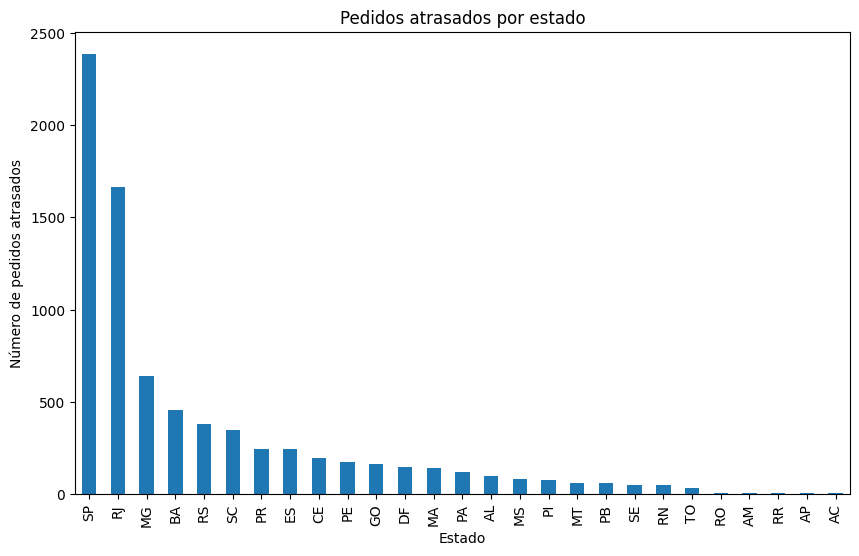

In [ ]:
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['atrasado'] = df_orders['order_delivered_customer_date'] > df_orders['order_estimated_delivery_date']
df = pd.merge(df_orders, df_customers, on='customer_id', how='inner')

atrasados_por_estado = df[df['atrasado'] == True].groupby('customer_state').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
atrasados_por_estado.plot(kind='bar')
plt.title('Pedidos atrasados por estado')
plt.xlabel('Estado')
plt.ylabel('Número de pedidos atrasados')
plt.show()

###quantidade de vendedores por estado

<ipython-input-43-2ee85547eee3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sellers_per_state.index, y=sellers_per_state.values, palette="viridis")


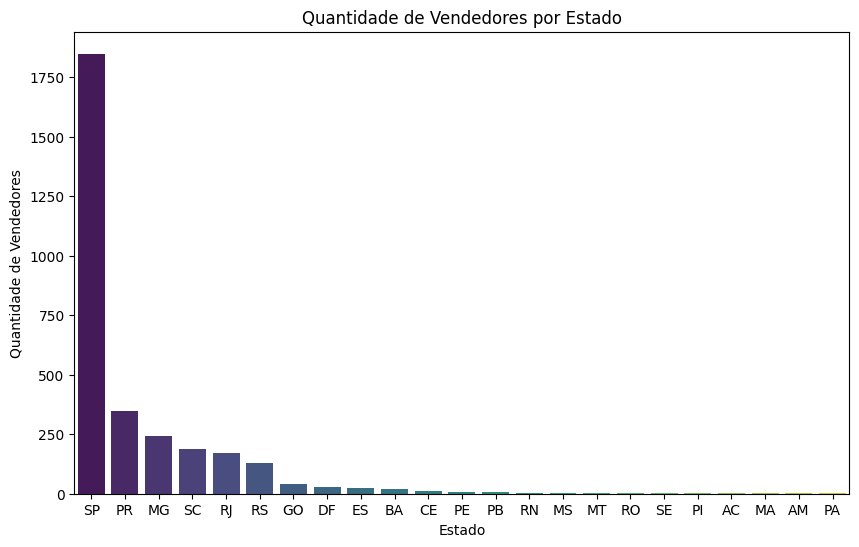

In [ ]:
sellers_per_state = df_sellers['seller_state'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=sellers_per_state.index, y=sellers_per_state.values, palette="viridis")

plt.title('Quantidade de Vendedores por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Vendedores')
plt.show()

###Quantidade de Reviews Negativas por Estad

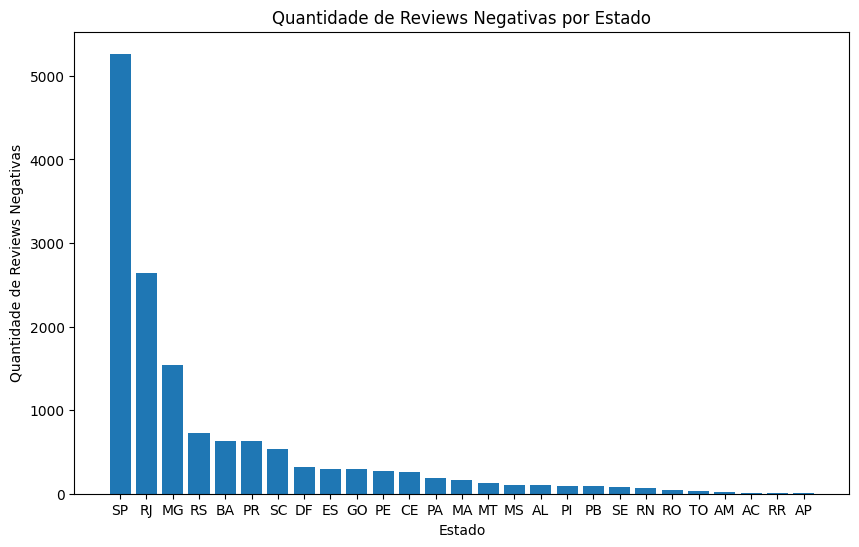

In [ ]:
df_r_negativas = pd.merge(df_reviews, df_orders, on='order_id')
df_r_negativas = pd.merge(df_r_negativas, df_customers, on='customer_id')


df_negative = df_r_negativas[df_r_negativas['review_score'] < 3]

negative_counts = df_negative['customer_state'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(negative_counts.index, negative_counts.values)
plt.xlabel('Estado')
plt.ylabel('Quantidade de Reviews Negativas')
plt.title('Quantidade de Reviews Negativas por Estado')
plt.show()


- Tomada de decisão:
 - Realocar funcionários de Paraná para São Paulo





- Métricas para acompanhar:
 - Satisfação dos clientes de SP e PR para que não tenha um défict de qualidade das entregas e um aumento de reviews negativas no estado do PR
 - Datas de entrega (se estão dentro do prazo estipulado)

##Estados que podem abrir um centro de distribuição  e estado que vende menos

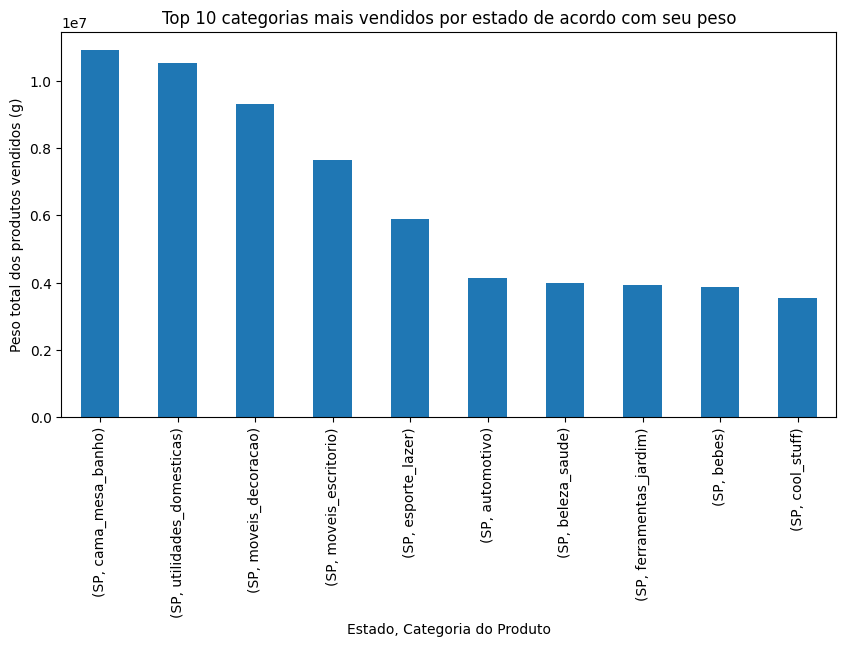

In [ ]:
df = pd.merge(df_orders, df_customers, on='customer_id')
df = pd.merge(df, df_items, on='order_id')
df = pd.merge(df, df_products, on='product_id')
grouped = df.groupby(['customer_state', 'product_category_name'])['product_weight_g'].sum().sort_values(ascending=False)

grouped = grouped.head(10)

plt.figure(figsize=(10,5))
grouped.plot(kind='bar')
plt.title('Top 10 categorias mais vendidos por estado de acordo com seu peso')
plt.xlabel('Estado, Categoria do Produto')
plt.ylabel('Peso total dos produtos vendidos (g)')
plt.show()

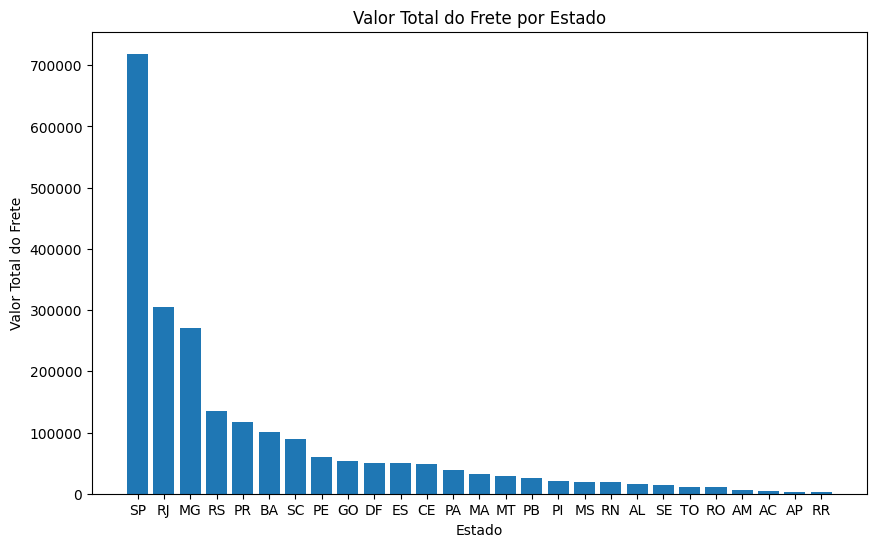

In [ ]:
df = pd.merge(df_items, df_orders, on='order_id')
df = pd.merge(df, df_customers, on='customer_id')

freight_by_state = df.groupby('customer_state')['freight_value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(freight_by_state.index, freight_by_state.values)
plt.xlabel('Estado')
plt.ylabel('Valor Total do Frete')
plt.title('Valor Total do Frete por Estado')
plt.show()
#funil

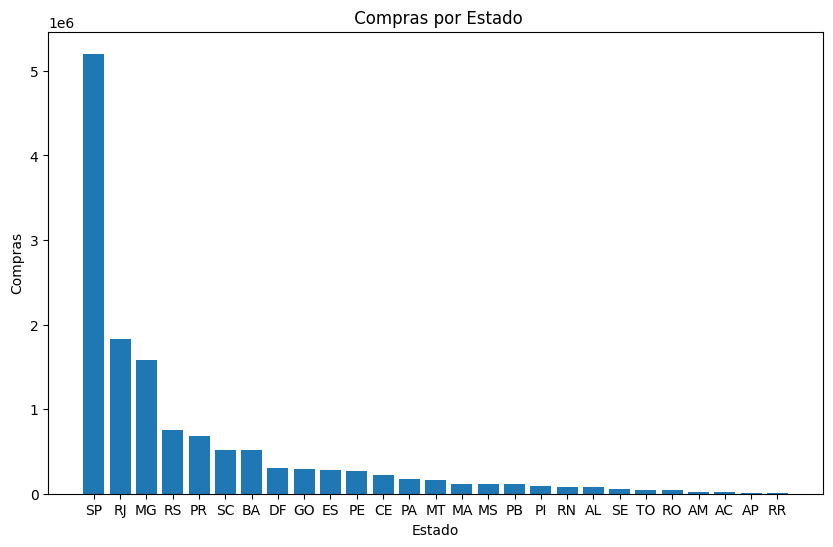

In [ ]:
df_compras_estado = pd.merge(df_items, df_orders, on='order_id')
df_compras_estado = pd.merge(df_compras_estado, df_customers, on='customer_id')

average_purchase_by_state = df_compras_estado.groupby('customer_state')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(average_purchase_by_state.index, average_purchase_by_state.values)
plt.xlabel('Estado')
plt.ylabel('Compras')
plt.title(' Compras por Estado')
plt.show()


- Tomada de Decisão:
 - Formar novas parcerias com empresas de logística no estado de SP

- Métricas para acompanhar
 - Reviews das entregas
 - O sistema de entrega dos pedidos

##Melhorar categorias com reviews negativas

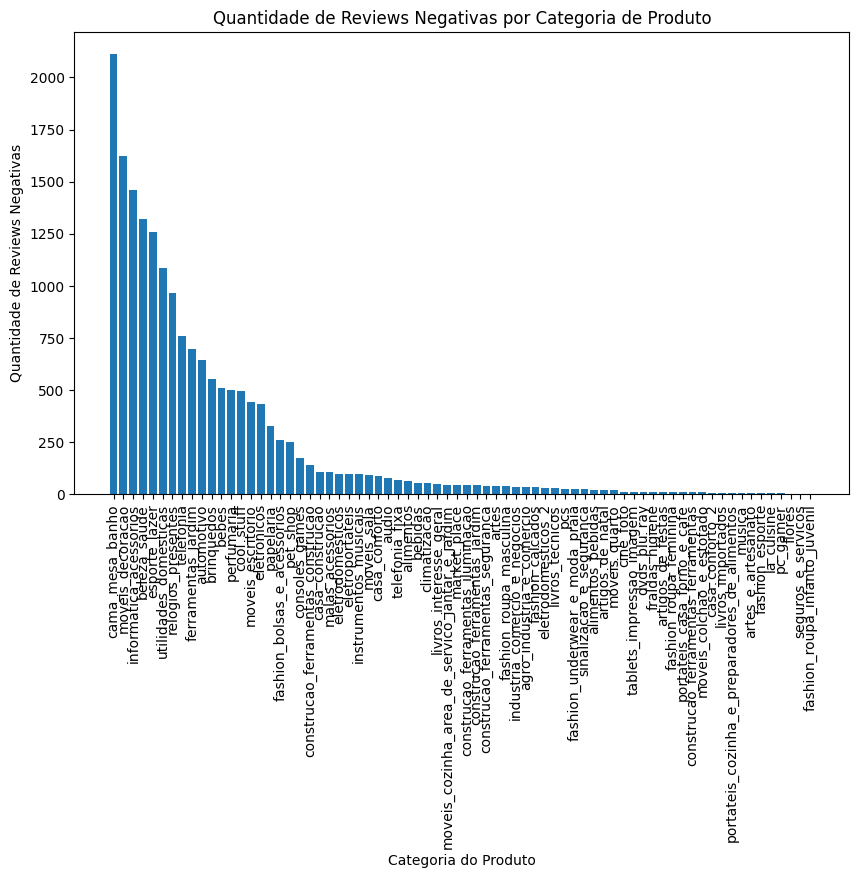

In [ ]:
df_qnt_ngtv = pd.merge(df_reviews, df_orders, on='order_id')
df_qnt_ngtv = pd.merge(df_qnt_ngtv, df_customers, on='customer_id')
df_qnt_ngtv = pd.merge(df_qnt_ngtv, df_items, on='order_id')
df_qnt_ngtv = pd.merge(df_qnt_ngtv, df_products, on='product_id')

df_negative = df_qnt_ngtv[df_qnt_ngtv['review_score'] < 3]


negative_counts = df_negative['product_category_name'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(negative_counts.index, negative_counts.values)
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Reviews Negativas')
plt.title('Quantidade de Reviews Negativas por Categoria de Produto')
plt.xticks(rotation=90)
plt.show()


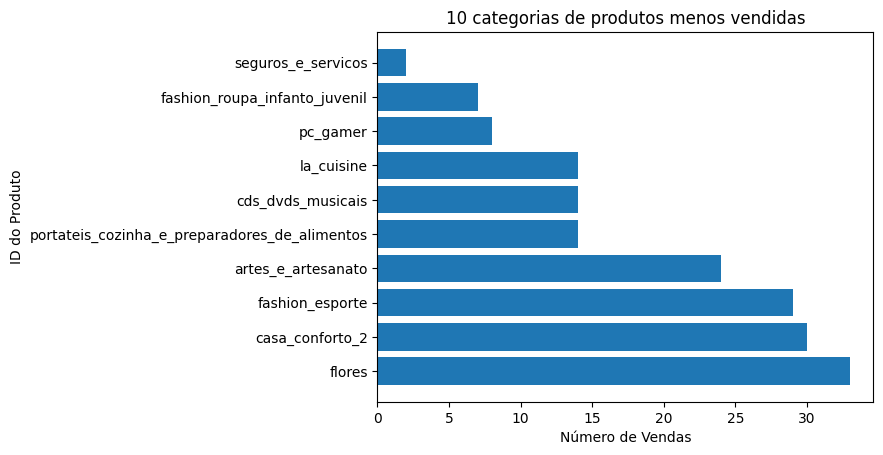

In [ ]:
df = pd.merge(df_items, df_orders, on='order_id')
df = pd.merge(df, df_products, on='product_id')

#filtandro so pra pedidos entregues
df = df[df['order_status'] == 'delivered']

product_counts = df['product_category_name'].value_counts()

least_sold_products = product_counts[-10:]


plt.barh(least_sold_products.index, least_sold_products.values)
plt.xlabel('Número de Vendas')
plt.ylabel('ID do Produto')
plt.title('10 categorias de produtos menos vendidas')
plt.show()

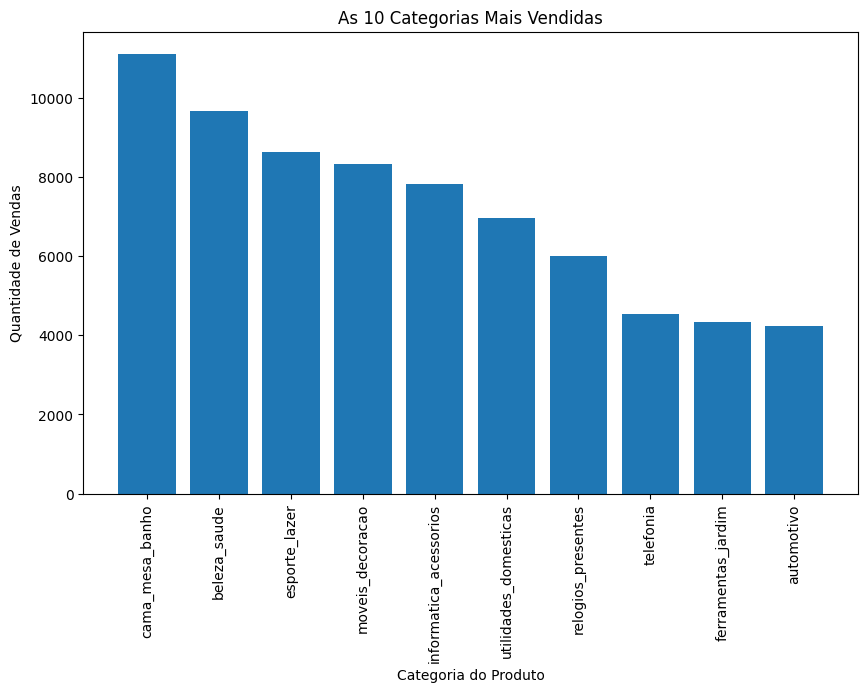

In [ ]:
df = pd.merge(df_items, df_orders, on='order_id')
df = pd.merge(df, df_customers, on='customer_id')
df = pd.merge(df, df_products, on='product_id')

sales_counts = df['product_category_name'].value_counts()

top10_categories = sales_counts[:10]

plt.figure(figsize=(10,6))
plt.bar(top10_categories.index, top10_categories.values)
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.title('As 10 Categorias Mais Vendidas')
plt.xticks(rotation=90)
plt.show()


- Tomadas de decisão:
 - Formar parcerias com empresas de logística com o intuito de baratear o frete dos produtos da categoria "cama_mesa_banho", pois os mesmos, possuem frete elevado devido o seu peso

-Métricas para acompanhar:
  - Reviews dos clientes
  - Acompanhar as entregas da categoria "cama mesa e banho"
  - Preço do frete de "cama mesa e banho"

##Produtos pereciveis

<ipython-input-52-715a40aaa334>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pereci['ped_atrasado'] = df_pereci['order_delivered_customer_date'] > df_pereci['order_estimated_delivery_date']


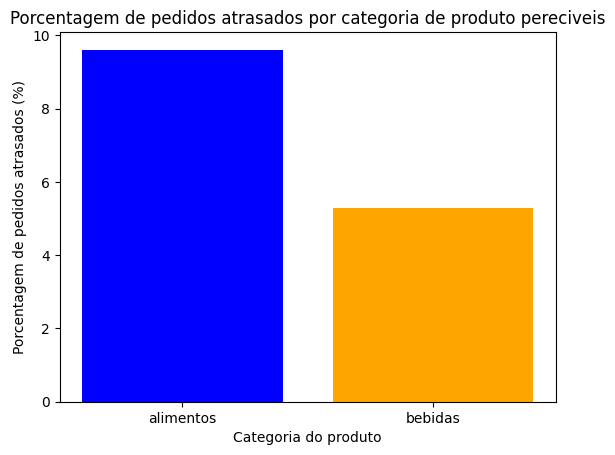

In [ ]:
df_pereci = pd.merge(df_orders, df_items, on='order_id')
df_pereci = pd.merge(df_pereci, df_products, on='product_id')

df_pereci = df_pereci[df_pereci['product_category_name'].isin(['bebidas', 'alimentos'])]

df_pereci['ped_atrasado'] = df_pereci['order_delivered_customer_date'] > df_pereci['order_estimated_delivery_date']


df_grouped = df_pereci.groupby('product_category_name')['ped_atrasado'].mean().reset_index()
df_grouped['ped_atrasado'] *= 100

plt.bar(df_grouped['product_category_name'], df_grouped['ped_atrasado'], color=['blue', 'orange'])
plt.xlabel('Categoria do produto')
plt.ylabel('Porcentagem de pedidos atrasados (%)')
plt.title('Porcentagem de pedidos atrasados por categoria de produto pereciveis')

plt.show()
#ver reviews negativas de produtos como bebidas e alimento

- Tomadas de decisão:
 - Criar um fila de prioridade de produtos perecíveis para reduzir os atrasos do pedidos e evitar que os mesmo estraguem em estoque.

- Métricas para acompanhar:
 - Taxa de atraso do pedidos de produtos perecíveis
 - Fila dos outros pedidos para acompanhar se houve um défict no prazo das entregas do demais produtos.

##Adicionar um novo tipo de pagamento

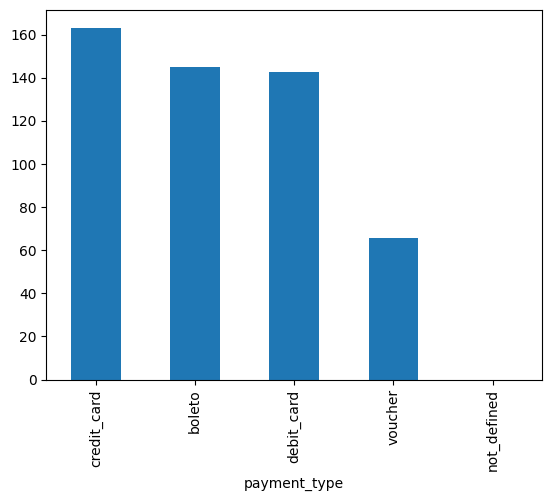

In [ ]:
df_payment_type=df_payments.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)
df_payment_type.plot(kind='bar')
plt.show()

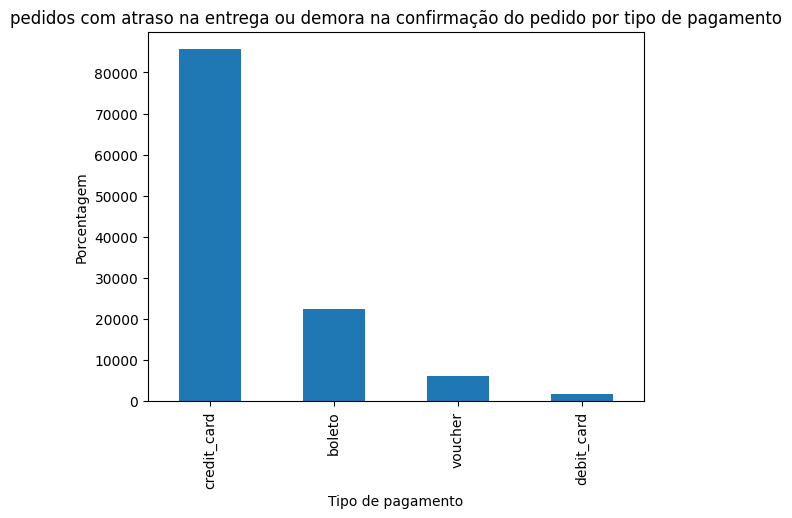

In [ ]:
df = pd.merge(df_payments, df_orders, on='order_id')
df = pd.merge(df, df_items, on='order_id')

df['delayed'] = (df['order_approved_at'] > df['order_purchase_timestamp'])
df_delayed = df.groupby('payment_type')['delayed'].sum().sort_values(ascending=False)

df_delayed.plot(kind='bar')
plt.title('pedidos com atraso na entrega ou demora na confirmação do pedido por tipo de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Porcentagem')
plt.show()


In [ ]:
df_orders['order_id'].count()

99441

- Tomada de decisão:
  - Adicionar um novo tipo de método de pagamento: Grande parte dos métodos de pagamentos usados sofreram algum tipo de atraso

- Métricas para acompanhar:
  - Utilização do novo método de pagamento

##analise de reviews

separar um df com produtos reviews e notas d reviews

tratar os dados e armazenar em uma nova coluna
com os dados tratados treinar um modelo para prever os dados
gerar uma cloud os words com as palavras negativas de cada produtos

In [ ]:
df_ml= pd.merge(df_items, df_orders, on='order_id')
df_ml=pd.merge(df_ml,df_reviews, on='order_id')
df_ml = df_ml[['review_score', 'product_id', 'review_comment_message']]
df_ml = df_ml.dropna()

df_ml.drop_duplicates(['review_comment_message'],inplace=True)
df_ml


,review_score,product_id,review_comment_message
0,5,4244733e06e7ecb4970a6e2683c13e61,"Perfeito, produto entregue antes do combinado."
2,5,c777355d18b72b67abbeef9df44fd0fd,Chegou antes do prazo previsto e o produto sur...
4,5,ac6c3623068f30de03045865e4e10089,Gostei pois veio no prazo determinado .
8,1,310ae3c140ff94b03219ad0adc3c778f,Na descrição do produto quando fui efetuar a c...
10,5,d63c1011f49d98b976c352955b1c4bea,A caixa do produto veio com uma pequena avaria...
...,...,...,...
112334,4,ea44caac707f7f1325182a538007f838,"Produto dentro do esperado. Entrega rápida, an..."
112336,4,437c05a395e9e47f9762e677a7068ce7,"Amo comprar no baratheon, sempre recebemos os ..."
112342,5,a5341e3f8155dbb3e62323d3ea289729,Adorei o produto ótimo e recomendo.
112360,1,e7be84ea9462aac5e2b0b08eb35ba7f1,A compra foi feita Há mais de um mes e ainda n...


In [ ]:
import nltk
from nltk import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_ml['classificacao']=df_ml["review_score"].replace([1,2,3,4,5],["Negativo",'Negativo,','Neutro','Positivo','Positivo',])
df_ml.classificacao

0         Positivo
2         Positivo
4         Positivo
8         Negativo
10        Positivo
            ...   
112334    Positivo
112336    Positivo
112342    Positivo
112360    Negativo
112370    Positivo
Name: classificacao, Length: 35692, dtype: object

In [ ]:
def Preprocessing(instancia):
  stemmer = nltk.stem.RSLPStemmer()
  instancia = re.sub(r"http\S+", "", str(instancia)).lower().replace(';','').replace('-','').replace(':','').replace(')','')
  stopwords = set(nltk.corpus.stopwords.words('portuguese'))
  palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
  return(" ".join(palavras))

reviews = [Preprocessing(i) for i in df_ml.review_comment_message]
reviews[:50]


['perfeito, produt entreg ant combinado.',
 'cheg ant praz previst produt surpreend qualidade. satisfatório.',
 'gost poi vei praz determin .',
 'descr produt efetu compra, detalh pent disfarce. receb produt verifiq not hav pent 0.5 1.5',
 'caix produt vei pequen avariação, rest vei perfeito...',
 'fiq pouc triste, ach cor coraçã verde, conform foto..... receb coraçã cor ros ver imag ilustrativas...... 😥',
 'excel serviç compr on line.',
 'mud opin assim receb produto. const sit produt entregue, recebi.',
 'receb td cert ant prazo!',
 'bom produt',
 '5',
 'sup recom',
 'receb long 10 dia após compra, cheg perfeit estado. ilustr idênt imag site. mater ótim qual tamanh perfeito. recom !',
 'produt descrito, satisfeit compra.',
 'produt entreg adequad rápido, gost serviço.',
 'entreg demorada. aind receb produt',
 'adorei, compr novamente!',
 'produt real.',
 'loj rápid entrega. incid fat vim produt escolh sim similar.',
 'entreg praz',
 'tud ok dentr praz',
 'entreg promet 24/05/17. dia 

In [ ]:
df_ml['tratamento']=reviews
df_ml

,review_score,product_id,review_comment_message,classificacao,tratamento
0,5,4244733e06e7ecb4970a6e2683c13e61,"Perfeito, produto entregue antes do combinado.",Positivo,"perfeito, produt entreg ant combinado."
2,5,c777355d18b72b67abbeef9df44fd0fd,Chegou antes do prazo previsto e o produto sur...,Positivo,cheg ant praz previst produt surpreend qualida...
4,5,ac6c3623068f30de03045865e4e10089,Gostei pois veio no prazo determinado .,Positivo,gost poi vei praz determin .
8,1,310ae3c140ff94b03219ad0adc3c778f,Na descrição do produto quando fui efetuar a c...,Negativo,"descr produt efetu compra, detalh pent disfarc..."
10,5,d63c1011f49d98b976c352955b1c4bea,A caixa do produto veio com uma pequena avaria...,Positivo,"caix produt vei pequen avariação, rest vei per..."
...,...,...,...,...,...
112334,4,ea44caac707f7f1325182a538007f838,"Produto dentro do esperado. Entrega rápida, an...",Positivo,"produt dentr esperado. entreg rápida, ant prazo."
112336,4,437c05a395e9e47f9762e677a7068ce7,"Amo comprar no baratheon, sempre recebemos os ...",Positivo,"amo compr baratheon, sempr receb produt ant pr..."
112342,5,a5341e3f8155dbb3e62323d3ea289729,Adorei o produto ótimo e recomendo.,Positivo,ador produt ótim recomendo.
112360,1,e7be84ea9462aac5e2b0b08eb35ba7f1,A compra foi feita Há mais de um mes e ainda n...,Negativo,"compr feit me aind nao receb produto, send nec..."


In [ ]:
vectorizer =CountVectorizer(analyzer="word")
freq_reviews = vectorizer.fit_transform(df_ml.tratamento)
type(freq_reviews)

scipy.sparse._csr.csr_matrix

In [ ]:
from sklearn.pipeline import Pipeline
pipeline_simples=Pipeline([
    ('counts',CountVectorizer()),
    ('classifier',MultinomialNB())
])
pipeline_simples.fit(df_ml.tratamento,df_ml.classificacao)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [ ]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

In [ ]:
resultados=cross_val_predict(pipeline_simples,df_ml.tratamento,df_ml.classificacao,cv=10)
resultados

array(['Positivo', 'Positivo', 'Positivo', ..., 'Positivo', 'Negativo',
       'Positivo'], dtype='<U9')

In [ ]:
metrics.accuracy_score(df_ml.classificacao,resultados)

0.769051888378348

In [ ]:
vectorizer= CountVectorizer(ngram_range=(1,2))
freq_reviews=vectorizer.fit_transform(df_ml.tratamento)
modelo= MultinomialNB()
modelo.fit(freq_reviews,df_ml.classificacao)

MultinomialNB()

In [ ]:
resultados=cross_val_predict(modelo,freq_reviews,df_ml.classificacao,cv=100)

In [ ]:
metrics.accuracy_score(df_ml.classificacao,resultados)

0.7776252381486047

In [ ]:
words = vectorizer.get_feature_names_out()
sum_words = freq_reviews.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [ ]:
pesos=pd.DataFrame(
    words_freq
)
pesos

,0,1
0,produt,15489
1,entreg,9708
2,compr,5908
3,cheg,5791
4,receb,5639
...,...,...
121908,cab bolsos,1
121909,projet,1
121910,feit me,1
121911,necess projet,1


In [ ]:
# Fit the pipeline
pipeline_simples.fit(df_ml.tratamento, df_ml.classificacao)

# Get the feature names
feature_names = pipeline_simples.named_steps['counts'].get_feature_names_out()

# Get the log probabilities of the features for each class
log_prob = pipeline_simples.named_steps['classifier'].feature_log_prob_

# Create a DataFrame for the log probabilities
pesos = pd.DataFrame(log_prob.T, index=feature_names)

# Display the top 10 features for each class
pesos.nlargest(10,0)


,0,1,2,3
produt,-3.161201,-3.550813,-3.416704,-2.865554
receb,-3.533309,-4.132407,-4.263763,-4.530154
compr,-3.708758,-4.215386,-4.347435,-4.145235
entreg,-3.878657,-4.179809,-4.033288,-3.205419
vei,-4.489539,-4.405383,-4.386365,-4.905851
aind,-4.556198,-5.214490,-5.156095,-5.598998
cheg,-4.575362,-4.871017,-4.646086,-3.650674
dia,-4.672609,-5.264921,-5.431607,-5.385034
produto,-4.724434,-5.300012,-5.152022,-4.741599
ped,-4.827695,-5.288178,-5.481204,-6.004463
